In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Import requests library
import requests
# Import API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
from citipy import citipy

In [2]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-56.000, high=80.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the lats and longs to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

768

In [6]:
# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval.     ")
print('------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.     
------------------------------
Processing Record 1 of Set 1 | itagi
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | riyadh
Processing Record 5 of Set 1 | taft
Processing Record 6 of Set 1 | tadine
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | lukovskaya
Processing Record 9 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | acarau
Processing Record 12 of Set 1 | katha
City not found. Skipping...
Processing Record 13 of Set 1 | weihai
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | banjar
Processing Record 16 of Set 1 | padang
Processing Record 17 of Set 1 | matara
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | warqla
City not found. Skipping...
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 

Processing Record 37 of Set 4 | kondinskoye
Processing Record 38 of Set 4 | sergeyevka
Processing Record 39 of Set 4 | norman wells
Processing Record 40 of Set 4 | teya
Processing Record 41 of Set 4 | denpasar
Processing Record 42 of Set 4 | kui buri
Processing Record 43 of Set 4 | hilo
Processing Record 44 of Set 4 | kayerkan
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | santa rosa
Processing Record 47 of Set 4 | kosya
City not found. Skipping...
Processing Record 48 of Set 4 | yomitan
City not found. Skipping...
Processing Record 49 of Set 4 | katobu
Processing Record 50 of Set 4 | kailua
Processing Record 1 of Set 5 | ca mau
Processing Record 2 of Set 5 | constantine
Processing Record 3 of Set 5 | agirish
Processing Record 4 of Set 5 | calabozo
Processing Record 5 of Set 5 | tazovskiy
Processing Record 6 of Set 5 | oak harbor
Processing Record 7 of Set 5 | cumaribo
City not found. Skipping...
Processing Record 8 of Set 5 | puerto el triunfo
Processi

Processing Record 20 of Set 8 | misratah
Processing Record 21 of Set 8 | santa isabel do rio negro
Processing Record 22 of Set 8 | aleksandrov gay
Processing Record 23 of Set 8 | denham springs
Processing Record 24 of Set 8 | jamnah
City not found. Skipping...
Processing Record 25 of Set 8 | smidovich
Processing Record 26 of Set 8 | sorong
Processing Record 27 of Set 8 | praia da vitoria
Processing Record 28 of Set 8 | luang prabang
Processing Record 29 of Set 8 | safakulevo
Processing Record 30 of Set 8 | marawi
Processing Record 31 of Set 8 | akdepe
Processing Record 32 of Set 8 | meyungs
City not found. Skipping...
Processing Record 33 of Set 8 | west bay
Processing Record 34 of Set 8 | dioknisi
Processing Record 35 of Set 8 | novyy urengoy
Processing Record 36 of Set 8 | chapleau
Processing Record 37 of Set 8 | mogadishu
Processing Record 38 of Set 8 | kiama
Processing Record 39 of Set 8 | tiznit
Processing Record 40 of Set 8 | bitam
Processing Record 41 of Set 8 | mahajanga
Proces

Processing Record 6 of Set 12 | lasa
Processing Record 7 of Set 12 | severobaykalsk
Processing Record 8 of Set 12 | severo-kurilsk
Processing Record 9 of Set 12 | touros
Processing Record 10 of Set 12 | baracoa
Processing Record 11 of Set 12 | huarmey
Processing Record 12 of Set 12 | talcahuano
Processing Record 13 of Set 12 | talas
Processing Record 14 of Set 12 | kovdor
Processing Record 15 of Set 12 | mimon
Processing Record 16 of Set 12 | pacific grove
Processing Record 17 of Set 12 | chara
Processing Record 18 of Set 12 | ambon
Processing Record 19 of Set 12 | halalo
City not found. Skipping...
Processing Record 20 of Set 12 | susanville
Processing Record 21 of Set 12 | bac lieu
Processing Record 22 of Set 12 | agadez
Processing Record 23 of Set 12 | vlakhopoulon
Processing Record 24 of Set 12 | gurgan
City not found. Skipping...
Processing Record 25 of Set 12 | paamiut
Processing Record 26 of Set 12 | hamilton
Processing Record 27 of Set 12 | fushe-arrez
Processing Record 28 of S

Processing Record 43 of Set 15 | goderich
Processing Record 44 of Set 15 | am timan
Processing Record 45 of Set 15 | zhetybay
City not found. Skipping...
Processing Record 46 of Set 15 | morros
Processing Record 47 of Set 15 | baiquan
Processing Record 48 of Set 15 | stratonion
Processing Record 49 of Set 15 | anadyr
Processing Record 50 of Set 15 | penco
Processing Record 1 of Set 16 | soe
Processing Record 2 of Set 16 | taltal
Processing Record 3 of Set 16 | armacao dos buzios
City not found. Skipping...
Processing Record 4 of Set 16 | moose factory
Processing Record 5 of Set 16 | cravo norte
Processing Record 6 of Set 16 | trincomalee
Processing Record 7 of Set 16 | bargal
City not found. Skipping...
Processing Record 8 of Set 16 | constitucion
Processing Record 9 of Set 16 | dmitriyevskoye
Processing Record 10 of Set 16 | den helder
Processing Record 11 of Set 16 | whitehorse
Processing Record 12 of Set 16 | lolua
City not found. Skipping...
Processing Record 13 of Set 16 | keuruu


In [7]:
len(city_data)

692

In [8]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itagi,-14.16,-40.01,66.16,81,49,2.42,BR,2020-12-25 01:03:24
1,Thompson,55.74,-97.86,-4.00,83,90,8.05,CA,2020-12-25 01:03:25
2,Riyadh,24.69,46.72,53.60,58,0,5.82,SA,2020-12-25 01:01:35
3,Taft,31.75,54.21,39.20,80,0,2.24,IR,2020-12-25 01:03:25
4,Tadine,-21.55,167.88,81.37,66,100,5.70,NC,2020-12-25 01:03:26
5,Avarua,-21.21,-159.78,82.40,65,4,5.82,CK,2020-12-25 01:03:26
6,Lukovskaya,43.73,44.63,19.40,100,78,4.47,RU,2020-12-25 01:03:26
7,Codrington,-38.27,141.97,61.68,57,82,11.50,AU,2020-12-25 01:03:27
8,Acarau,-2.89,-40.12,79.84,78,99,14.18,BR,2020-12-25 01:03:27
9,Weihai,37.50,122.11,37.99,71,0,15.46,CN,2020-12-25 00:59:30


In [9]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Itagi,BR,2020-12-25 01:03:24,-14.16,-40.01,66.16,81,49,2.42
1,Thompson,CA,2020-12-25 01:03:25,55.74,-97.86,-4.00,83,90,8.05
2,Riyadh,SA,2020-12-25 01:01:35,24.69,46.72,53.60,58,0,5.82
3,Taft,IR,2020-12-25 01:03:25,31.75,54.21,39.20,80,0,2.24
4,Tadine,NC,2020-12-25 01:03:26,-21.55,167.88,81.37,66,100,5.70
5,Avarua,CK,2020-12-25 01:03:26,-21.21,-159.78,82.40,65,4,5.82
6,Lukovskaya,RU,2020-12-25 01:03:26,43.73,44.63,19.40,100,78,4.47
7,Codrington,AU,2020-12-25 01:03:27,-38.27,141.97,61.68,57,82,11.50
8,Acarau,BR,2020-12-25 01:03:27,-2.89,-40.12,79.84,78,99,14.18
9,Weihai,CN,2020-12-25 00:59:30,37.50,122.11,37.99,71,0,15.46


In [10]:
# Create output CSV
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# Import time module
import time
# Get today's date in seconds
today = time.time()
today

1608858388.142689

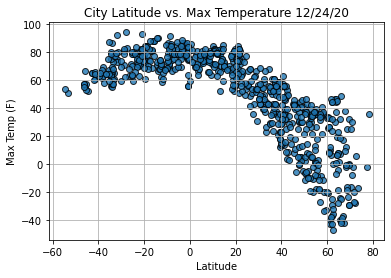

In [12]:
# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

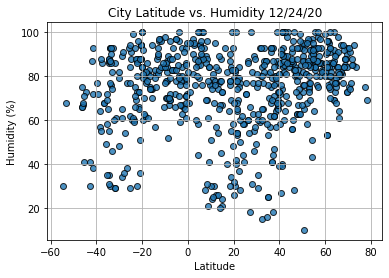

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity,
            edgecolor="black",
            linewidths=1, 
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

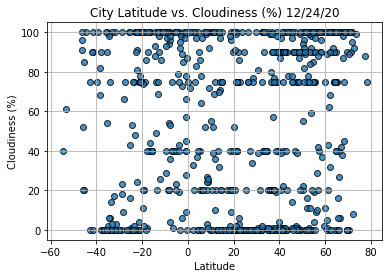

In [14]:
# Build scatter plot for lat vs. cloudiness
plt.scatter(lats, cloudiness,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

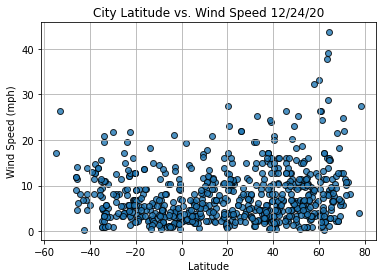

In [15]:
# Build the scatter plot for lat. vs. wind speed
plt.scatter(lats, wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress
import textwrap

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Clculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    "\n".join(textwrap.wrap(title, 100))
    plt.show()
    print(f"The p-value is: {p_value:.3f}")
    print(f"The r-value is: {r_value:.3f}")

In [17]:
index13 = city_data_df.loc[13]
index13

City                       Matara
Country                        LK
Date          2020-12-25 01:03:28
Lat                          5.95
Lng                         80.54
Max Temp                    75.24
Humidity                       89
Cloudiness                     97
Wind Speed                   3.85
Name: 13, dtype: object

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Thompson,CA,2020-12-25 01:03:25,55.74,-97.86,-4.00,83,90,8.05
2,Riyadh,SA,2020-12-25 01:01:35,24.69,46.72,53.60,58,0,5.82
3,Taft,IR,2020-12-25 01:03:25,31.75,54.21,39.20,80,0,2.24
6,Lukovskaya,RU,2020-12-25 01:03:26,43.73,44.63,19.40,100,78,4.47
9,Weihai,CN,2020-12-25 00:59:30,37.50,122.11,37.99,71,0,15.46


In [19]:
# Create dataframes for Northern and Southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [20]:
len(northern_hemi_df)

471

In [21]:
len(southern_hemi_df)

221

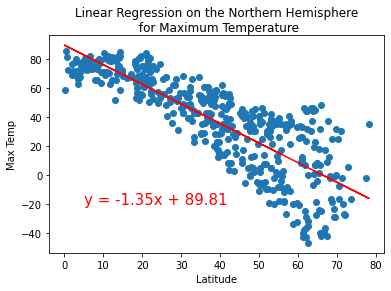

The p-value is: 0.000
The r-value is: -0.829


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(5,-20))


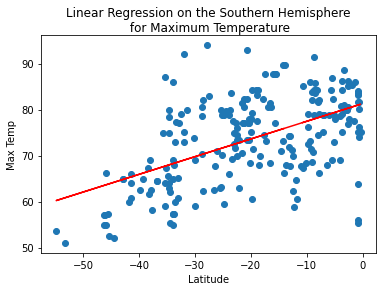

The p-value is: 0.000
The r-value is: 0.534


In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(-45,45))

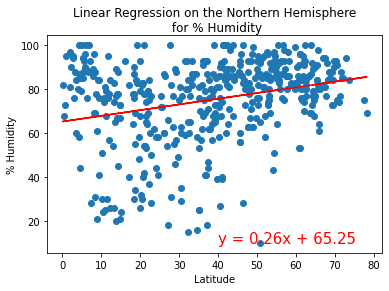

The p-value is: 0.000
The r-value is: 0.272


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (40,10))

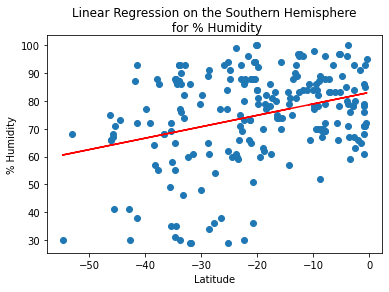

The p-value is: 0.000
The r-value is: 0.322


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (-50,15))

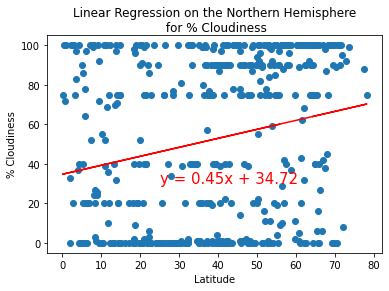

The p-value is: 0.000
The r-value is: 0.218


In [26]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

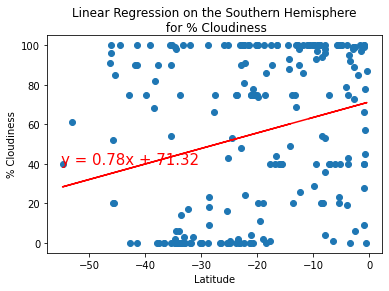

The p-value is: 0.000
The r-value is: 0.255


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (-55,40))

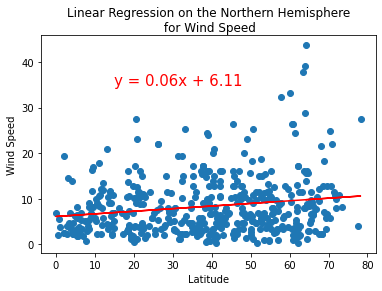

The p-value is: 0.000
The r-value is: 0.176


In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (15,35))

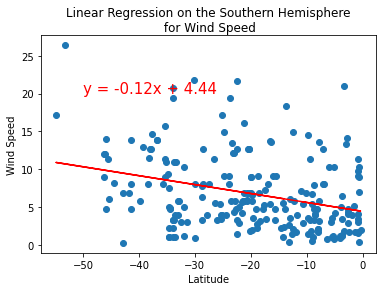

The p-value is: 0.000
The r-value is: -0.313


In [29]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (-50,20))